In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sp
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
from datetime import datetime as dt

# Data Reading

First we read the data and check if it worked.

In [2]:
df = pd.read_csv('daten.csv', delimiter=";", decimal=',' ,parse_dates=['Beginn Stunde', 'Ende Stunde'], index_col=0, date_parser=lambda x: dt.strptime(x, "%d.%m.%Y %H:%M"))

In [3]:
df.head()

,Ende Stunde,Stromspotpreise Deutschland [EUR/MWh],CO2 Preise [EUR/t],Gasspotpreise Deutschland [EUR/MWh],Stromverbrauch Deutschland [MW],Stromerzeugung Deutschland - Biomasse [MW],Stromerzeugung Deutschland - Braunkohle [MW],Stromerzeugung Deutschland - Gas [MW],Stromerzeugung Deutschland - Steinkohle[MW],Stromerzeugung Deutschland - Wasserkraft [MW],Stromerzeugung Deutschland - Nuklear [MW],Stromerzeugung Deutschland - Solar [MW],Stromerzeugung Deutschland - Wind Offshore [MW],Stromerzeugung Deutschland - Wind Onshore [MW]
Beginn Stunde,,,,,,,,,,,,,,
2018-07-01 00:00:00,2018-07-01 01:00:00,33.30,14.95,21.89,42346.50,4464.50,11928.75,2374.25,1238.50,1826.5,8939.75,0.0,2341.25,15277.50
2018-07-01 01:00:00,2018-07-01 02:00:00,26.42,14.95,21.89,40215.75,4460.25,11610.00,2367.00,1193.50,1826.5,8950.25,0.0,2266.00,14608.25
2018-07-01 02:00:00,2018-07-01 03:00:00,26.11,14.95,21.89,38870.50,4478.50,11073.25,2348.00,1217.75,1816.0,8918.50,0.0,2023.00,14176.25
2018-07-01 03:00:00,2018-07-01 04:00:00,22.12,14.95,21.89,37833.50,4477.75,10498.25,2361.25,1281.75,1800.0,8955.75,0.0,1730.75,13418.25
2018-07-01 04:00:00,2018-07-01 05:00:00,23.42,14.95,21.89,37345.75,4490.50,10496.00,2370.75,1284.50,1800.0,9003.00,1.5,1490.75,12351.00


In [4]:
df.describe()

,Stromspotpreise Deutschland [EUR/MWh],CO2 Preise [EUR/t],Gasspotpreise Deutschland [EUR/MWh],Stromverbrauch Deutschland [MW],Stromerzeugung Deutschland - Biomasse [MW],Stromerzeugung Deutschland - Braunkohle [MW],Stromerzeugung Deutschland - Gas [MW],Stromerzeugung Deutschland - Steinkohle[MW],Stromerzeugung Deutschland - Wasserkraft [MW],Stromerzeugung Deutschland - Nuklear [MW],Stromerzeugung Deutschland - Solar [MW],Stromerzeugung Deutschland - Wind Offshore [MW],Stromerzeugung Deutschland - Wind Onshore [MW]
count,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,40.702370,27.055703,15.534954,56519.604946,4626.378260,11254.326699,6327.580511,5381.163844,1595.051504,7647.691178,5049.724795,2757.415431,11143.295734
std,20.265248,8.589217,6.807275,9924.817062,230.517766,3807.359287,2626.079187,3767.269506,278.175808,1179.278601,7732.827838,1855.936456,8820.629769
min,-90.010000,14.950000,3.590000,33142.000000,3714.000000,2886.250000,904.250000,738.250000,895.250000,3382.250000,0.000000,0.000000,100.000000
25%,29.657500,22.015000,10.170000,48362.250000,4439.687500,8520.500000,4190.187500,2308.750000,1368.500000,6655.437500,0.000000,1056.500000,4337.500000
50%,40.410000,25.060000,14.790000,56190.500000,4642.375000,11821.625000,6165.750000,4176.500000,1579.000000,7786.000000,155.875000,2627.125000,8535.875000
75%,51.930000,28.002500,21.700000,64850.312500,4832.250000,14591.500000,8132.312500,7555.875000,1814.312500,8550.625000,8118.250000,4314.312500,15763.062500
max,200.040000,56.500000,33.290000,79078.250000,5050.750000,17511.750000,15033.250000,17423.000000,2244.500000,9524.000000,36175.250000,7126.250000,40987.250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26304 entries, 2018-07-01 00:00:00 to 2021-06-30 23:00:00
Data columns (total 14 columns):
 #   Column                                           Non-Null Count  Dtype         
---  ------                                           --------------  -----         
 0   Ende Stunde                                      26304 non-null  datetime64[ns]
 1   Stromspotpreise Deutschland [EUR/MWh]            26304 non-null  float64       
 2   CO2 Preise [EUR/t]                               26304 non-null  float64       
 3   Gasspotpreise Deutschland [EUR/MWh]              26304 non-null  float64       
 4   Stromverbrauch Deutschland [MW]                  26304 non-null  float64       
 5   Stromerzeugung Deutschland - Biomasse [MW]       26304 non-null  float64       
 6   Stromerzeugung Deutschland - Braunkohle [MW]     26304 non-null  float64       
 7   Stromerzeugung Deutschland - Gas [MW]            26304 non-null  float64       
 8   S

In [6]:
# df['Stromspotpreise Deutschland [EUR/MWh]'] = df['Stromspotpreise Deutschland [EUR/MWh]'].str.replace(',', '.')
# df['Stromspotpreise Deutschland [EUR/MWh]'] = pd.to_numeric(df['Stromspotpreise Deutschland [EUR/MWh]'])
# df['Stromspotpreise Deutschland [EUR/MWh]'][0]

<AxesSubplot:xlabel='Beginn Stunde'>

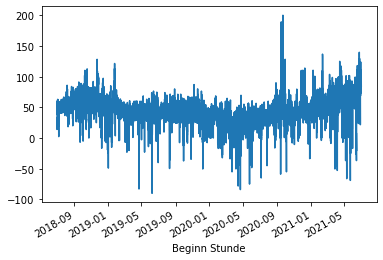

In [7]:
df["Stromspotpreise Deutschland [EUR/MWh]"].plot()

We also add a column for the total production

In [8]:
df["Stromerzeugung Deutschland [MW]"] = df[
    [
        "Stromerzeugung Deutschland - Biomasse [MW]",
        "Stromerzeugung Deutschland - Braunkohle [MW]",
        "Stromerzeugung Deutschland - Gas [MW]",
        "Stromerzeugung Deutschland - Steinkohle[MW]",
        "Stromerzeugung Deutschland - Wasserkraft [MW]",
        "Stromerzeugung Deutschland - Nuklear [MW]",
        "Stromerzeugung Deutschland - Solar [MW]",
        "Stromerzeugung Deutschland - Wind Offshore [MW]",
        "Stromerzeugung Deutschland - Wind Onshore [MW]",
    ]
].sum(axis=1)

# Time Series Analysis

First we define a function to plot our decompositions in certain time slots

In [9]:
def plot_time_series_analysis(decomposition, start_date, end_date):
    """
    Plot time series analysis based on decomposition.

    Parameters:
        decomposition (statsmodels.tsa.seasonal.DecomposeResult): Result of seasonal decomposition.
        start_date (str): Start date of the time series data (format: 'YYYY-MM-DD').
        end_date (str): End date of the time series data (format: 'YYYY-MM-DD').
    """
    # Extracting components from the decomposition
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid

    # Convert start and end dates to datetime objects
    start_date = pd.to_datetime(start_date)
    end_date = pd.to_datetime(end_date)

    # Plotting
    plt.figure(figsize=(12, 8))

    plt.subplot(511)
    plt.plot(trend[start_date:end_date], label='Trend')
    plt.legend(loc='best')
    plt.title('Trend')

    plt.subplot(512)
    plt.plot(seasonal[start_date:end_date], label='Seasonality')
    plt.legend(loc='best')
    plt.title('Seasonality')

    plt.subplot(513)
    plt.plot(residual[start_date:end_date], label='Residuals')
    plt.legend(loc='best')
    plt.title('Residuals')

    plt.subplot(514)
    plt.plot((trend + seasonal)[start_date:end_date], label='Trend + Seasonality')
    plt.legend(loc='best')
    plt.title('Trend + Seasonality')

    plt.subplot(515)
    filtered = df.loc[start_date:end_date]
    plt.plot(filtered.index, filtered['Stromspotpreise Deutschland [EUR/MWh]'], label='Original')
    plt.legend()
    plt.title('Original')

    plt.tight_layout()
    plt.show()


Now we decompose the Stromspotpreise in an additive model with a 24 hour period.

In [10]:
#df = df[~df.index.duplicated(keep='first')].resample('H').interpolate()

decomposition = seasonal_decompose(df['Stromspotpreise Deutschland [EUR/MWh]'], model='additive', period=24)


Plot the data for first 2 weeks of January 2019 and the whole year of 2019

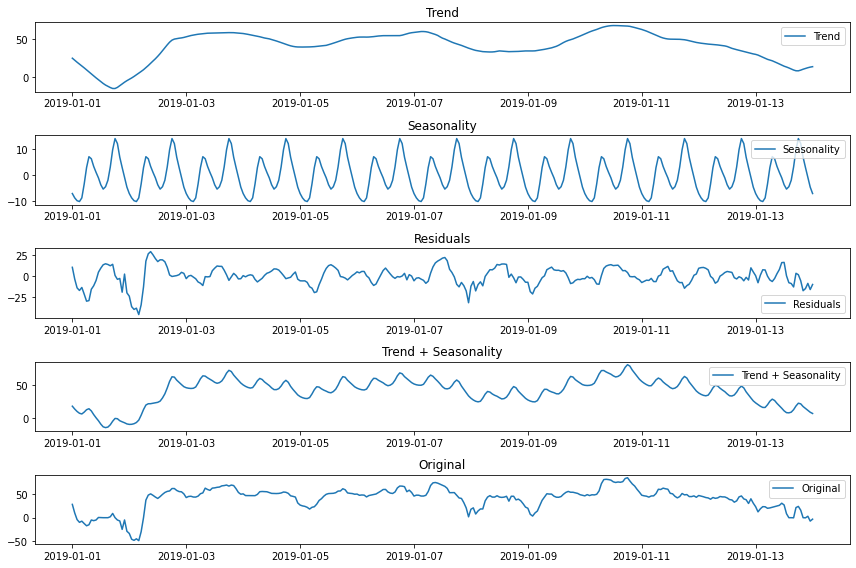

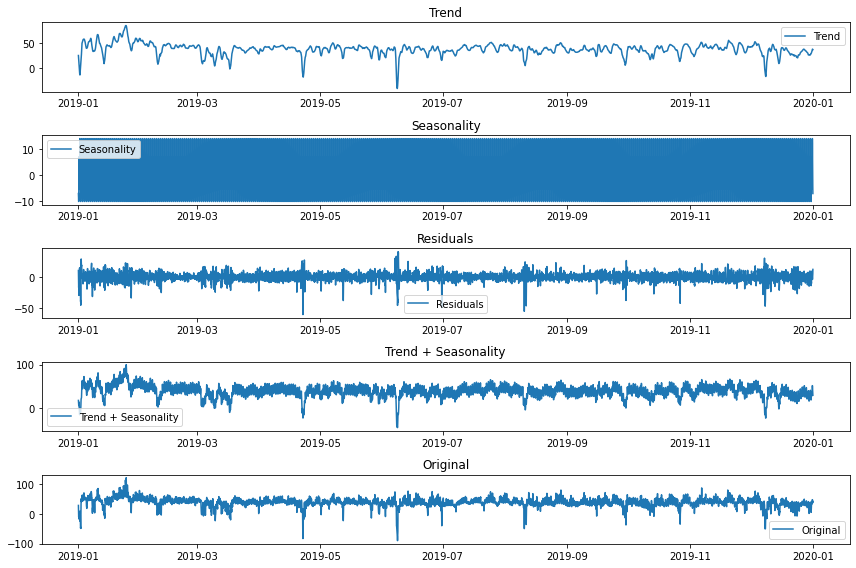

In [11]:
plot_time_series_analysis(decomposition,'2019-01-01','2019-01-14')
plot_time_series_analysis(decomposition,'2019-01-01','2020-01-01')

Now we do a decomposition into a weekly period, and plot January 2019 and the whole year of 2019

In [12]:
decomposition = seasonal_decompose(df['Stromspotpreise Deutschland [EUR/MWh]'], model='additive', period=24 * 7)

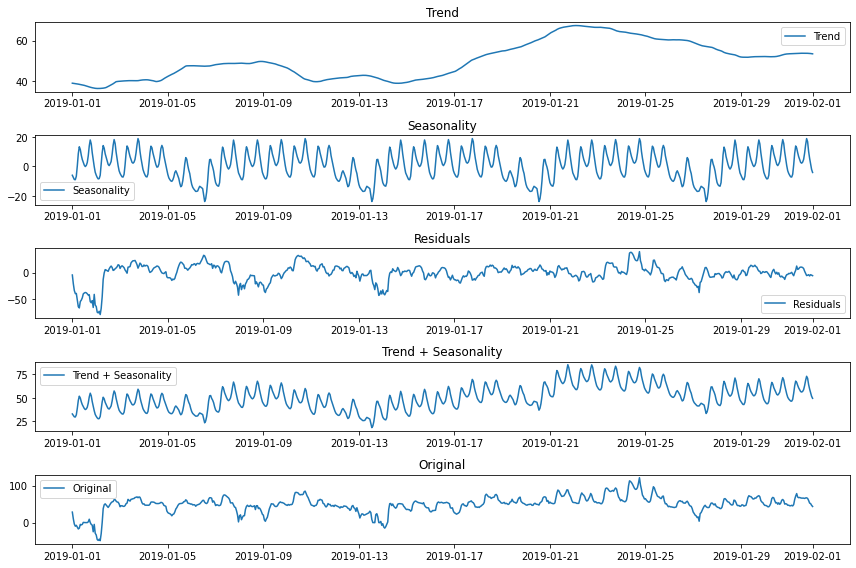

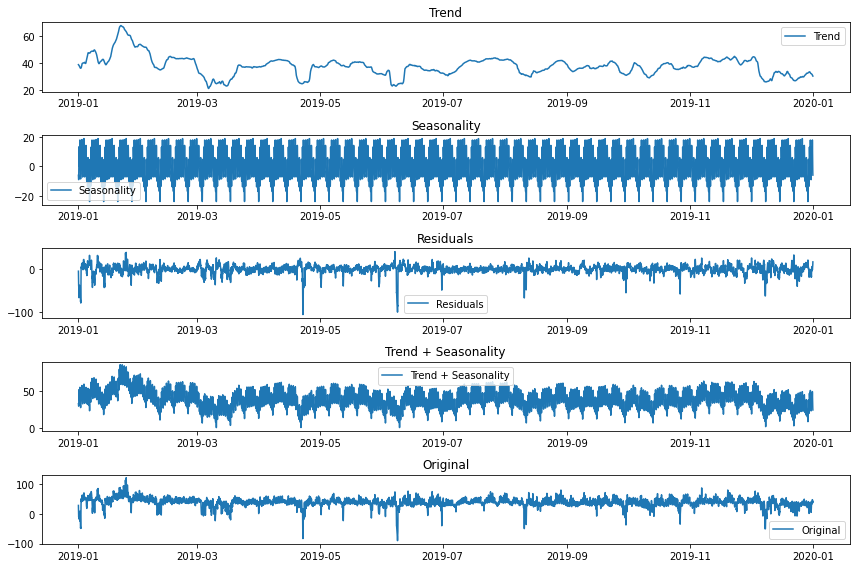

In [13]:
plot_time_series_analysis(decomposition,'2019-01-01','2019-02-01')
plot_time_series_analysis(decomposition,'2019-01-01','2020-01-01')

There can already be seen some structures.

Daily
- prices seem to below during the night and high over the day
- during lunchtimes prices go down, and then slowly rising to the peak shortly before nighttime

Weekly
- prices are lower during weekends

Now we try to resample our data into monthly averages and plot for the total time period

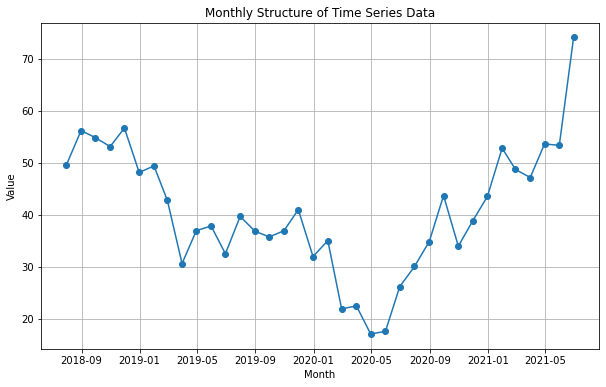

In [14]:
# Resample data to monthly frequency
df_monthly = df.resample('M').mean()  # You can use other aggregation methods like sum, median, etc., instead of mean

# Plot the monthly structure
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly['Stromspotpreise Deutschland [EUR/MWh]'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Monthly Structure of Time Series Data')
plt.grid(True)
plt.show()

And we can also do the same for weekly and daily averages.

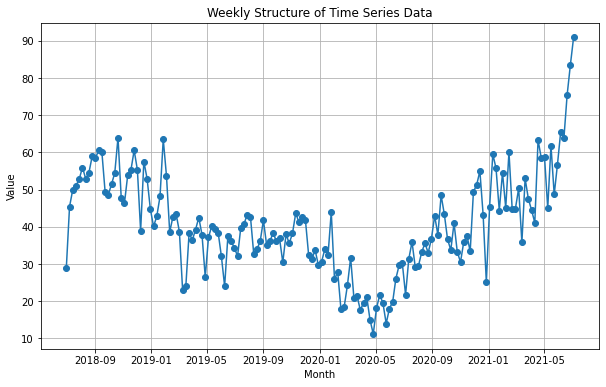

In [15]:
# Resample data to monthly frequency
df_weekly = df.resample('W').mean()  # You can use other aggregation methods like sum, median, etc., instead of mean

# Plot the monthly structure
plt.figure(figsize=(10, 6))
plt.plot(df_weekly.index, df_weekly['Stromspotpreise Deutschland [EUR/MWh]'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Value')
plt.title('Weekly Structure of Time Series Data')
plt.grid(True)
plt.show()

What we can also do, is resample our data to daily averages and then try a seasonal decomposition with the period of one week.

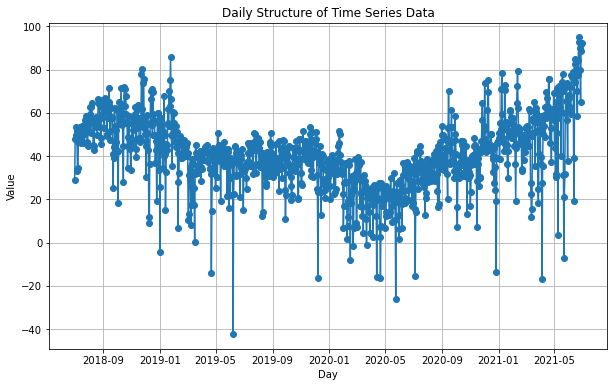

In [16]:
# Resample data to daily frequency

df_daily = df.resample('D').mean()  # You can use other aggregation methods like sum, median, etc., instead of mean

# Plot the daily structure
plt.figure(figsize=(10, 6))
plt.plot(df_daily.index, df_daily['Stromspotpreise Deutschland [EUR/MWh]'], marker='o', linestyle='-')
plt.xlabel('Day')
plt.ylabel('Value')
plt.title('Daily Structure of Time Series Data')
plt.grid(True)
plt.show()

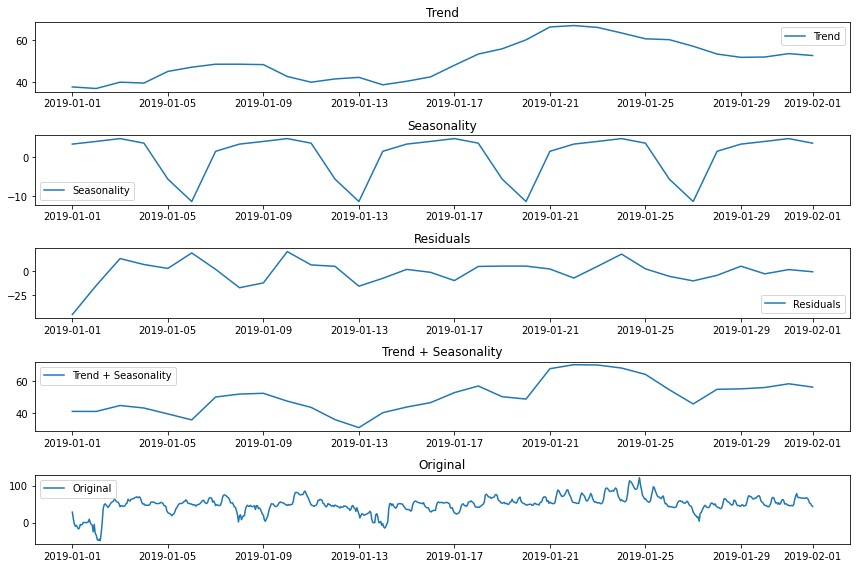

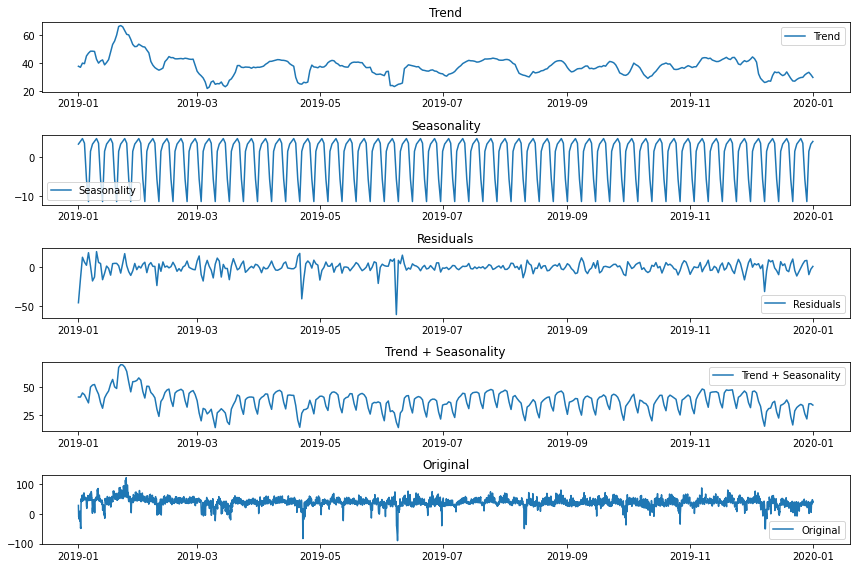

In [17]:
decomposition = seasonal_decompose(df_daily['Stromspotpreise Deutschland [EUR/MWh]'], model='additive', period=7)
plot_time_series_analysis(decomposition,'2019-01-01','2019-02-01')
plot_time_series_analysis(decomposition,'2019-01-01','2020-01-01')

Now we compare different years for weekly averages

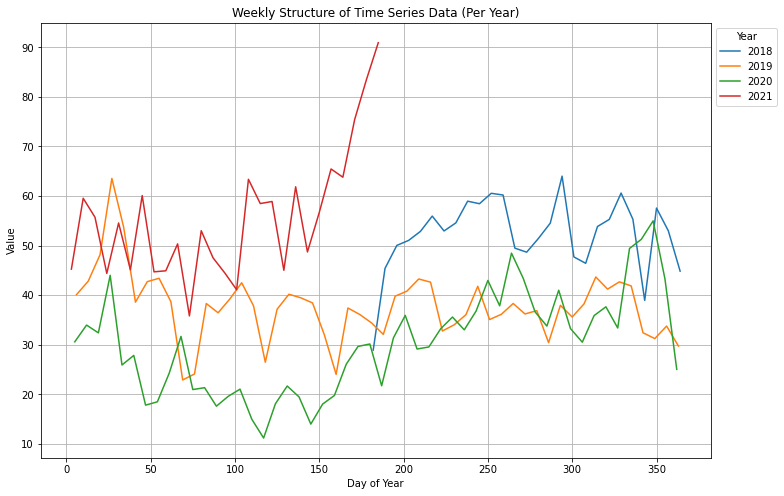

In [18]:
grouped = df_weekly.groupby(df_weekly.index.year)

# Plot weekly averages for each year
plt.figure(figsize=(12, 8))
for year, group in grouped:
    plt.plot(group.index.dayofyear, group['Stromspotpreise Deutschland [EUR/MWh]'], label=str(year))

plt.xlabel('Day of Year')
plt.ylabel('Value')
plt.title('Weekly Structure of Time Series Data (Per Year)')
plt.legend(title='Year', loc='upper left', bbox_to_anchor=(1,1))
plt.grid(True)
plt.show()

Here one can see, that the Prices in 2021 have risen slightly above the values of previous years. And similarily prices in 2020 lie slightly under previous years.

Now we can compare seasonal decompositions for each year.

In [19]:
def plot_time_series_analysis_yearly(decomposition):
    """
    Plot time series analysis based on decomposition.

    Parameters:
        decomposition (statsmodels.tsa.seasonal.DecomposeResult): Result of seasonal decomposition.
    """

    # Extracting components from the decomposition
    trend = decomposition.trend
    grouped_trend = trend.groupby(trend.index.year)
    seasonal = decomposition.seasonal
    grouped_seasonal = seasonal.groupby(seasonal.index.year)
    residual = decomposition.resid
    grouped_residual = residual.groupby(residual.index.year)


    # Plotting
    plt.figure(figsize=(12, 8))

    plt.subplot(511)
    for year, group in grouped_trend:
        plt.plot(group.index.dayofyear, group, label=year)
    plt.legend(loc='best')
    plt.title('Trend')

    plt.subplot(512)
    for year, group in grouped_seasonal:
        plt.plot(group.index.dayofyear, group, label=year)
    plt.legend(loc='best')
    plt.title('Seasonality')

    plt.subplot(513)
    for year, group in grouped_residual:
        plt.plot(group.index.dayofyear, group, label=year)
    plt.legend(loc='best')
    plt.title('Residuals')

    plt.subplot(514)
    filtered = df.groupby(df.index.year)
    for year, group in filtered:
        plt.plot(group.index.dayofyear, group['Stromspotpreise Deutschland [EUR/MWh]'], label=year)
    plt.legend()
    plt.title('Original')

    plt.tight_layout()
    plt.show()


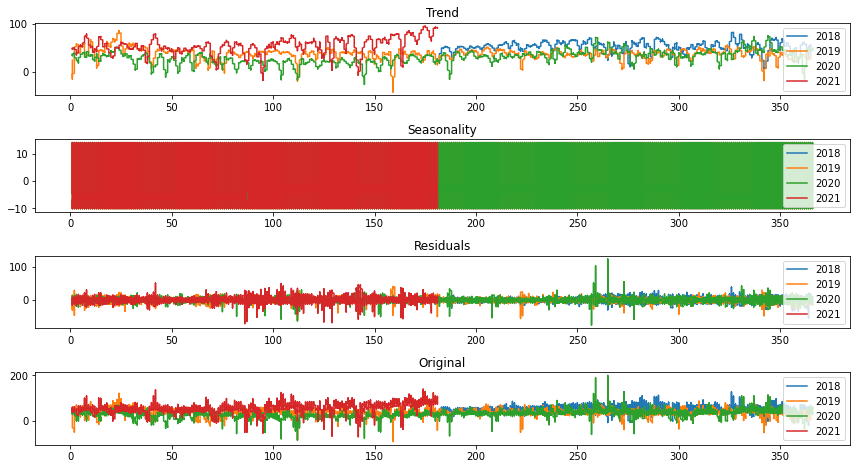

In [20]:
decomposition = seasonal_decompose(df['Stromspotpreise Deutschland [EUR/MWh]'], model='additive', period=24)
plot_time_series_analysis_yearly(decomposition)

# Correlations

We will look at the correlation coefficients, to see if production of certain energy types significantly impacts the prices.

In [21]:
# Select the column for which you want to calculate correlations
column_of_interest = 'Stromspotpreise Deutschland [EUR/MWh]'

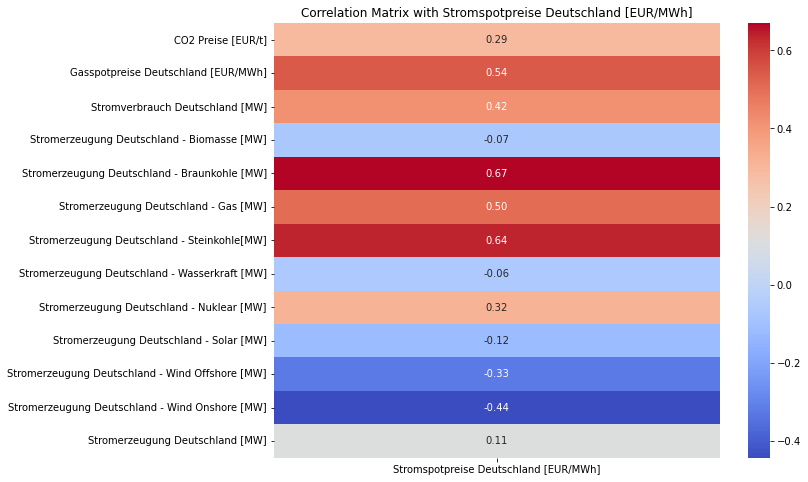

In [22]:
# # Convert columns to numeric data types
# df = df.apply(pd.to_numeric, errors='coerce')

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Extract correlations of the column of interest with all other columns
correlations_with_column = correlation_matrix[[column_of_interest]].drop(column_of_interest)
correlations_with_column.rename(columns={'Stromspotpreise Deutschland [EUR/MWh]' : 'all time'})

# Generate heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_with_column, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Correlation Matrix with {column_of_interest}')
plt.show()


To get some better Results we do this for each year.

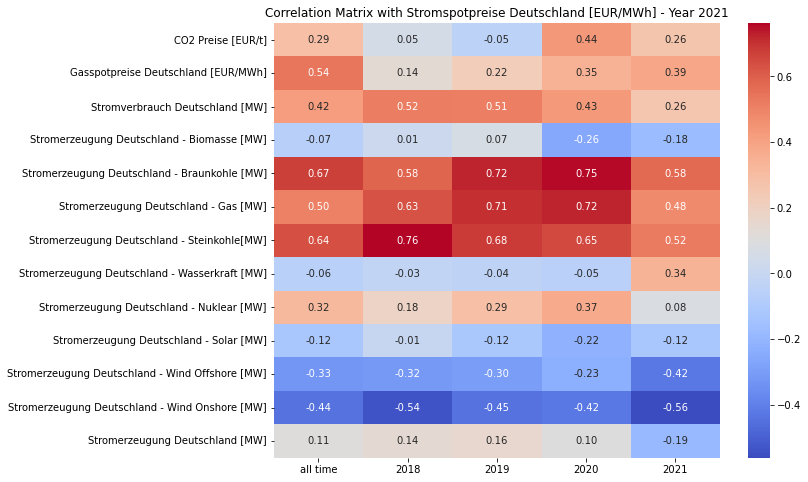

In [23]:
# Extract year from the index
df['Year'] = df.index.year

# Group DataFrame by year
grouped_df = df.groupby('Year')

# Iterate over groups and calculate correlation matrix for each year
for year, group_df in grouped_df:
    # Calculate the correlation matrix
    correlation_matrix = group_df.corr()
    
    # Select the column for which you want to calculate correlations
    column_of_interest = 'Stromspotpreise Deutschland [EUR/MWh]'
    
    # Extract correlations of the column of interest with all other columns
    correlations_with_column[year] = correlation_matrix[[column_of_interest]].drop(column_of_interest)

#rename first column
correlations_with_column = correlations_with_column.rename(columns={"Stromspotpreise Deutschland [EUR/MWh]" : "all time"})

# Generate heatmap for each year
plt.figure(figsize=(10, 8))
sns.heatmap(correlations_with_column, annot=True, cmap='coolwarm', fmt='.2f')
plt.title(f'Correlation Matrix with {column_of_interest} - Year {year}')
plt.show()

One can see that the Impact of Production of Steinkohle has decreased in the Year of 2021. We plot these values for each year.

In [24]:
correlations_with_column

,all time,2018,2019,2020,2021
CO2 Preise [EUR/t],0.289426,0.053286,-0.046857,0.436166,0.262078
Gasspotpreise Deutschland [EUR/MWh],0.540315,0.136659,0.222468,0.346824,0.386741
Stromverbrauch Deutschland [MW],0.416710,0.517018,0.512868,0.430140,0.256950
Stromerzeugung Deutschland - Biomasse [MW],-0.065431,0.014136,0.067071,-0.258908,-0.176271
Stromerzeugung Deutschland - Braunkohle [MW],0.670135,0.582132,0.722388,0.753800,0.575812
Stromerzeugung Deutschland - Gas [MW],0.504522,0.632890,0.705023,0.724040,0.480414
Stromerzeugung Deutschland - Steinkohle[MW],0.635669,0.762892,0.681759,0.651656,0.520366
Stromerzeugung Deutschland - Wasserkraft [MW],-0.061317,-0.027686,-0.040288,-0.054854,0.342508
Stromerzeugung Deutschland - Nuklear [MW],0.315141,0.183402,0.288065,0.372728,0.081904
Stromerzeugung Deutschland - Solar [MW],-0.117832,-0.007417,-0.115590,-0.220614,-0.122846


We will use absolute values, to not have unimpactful values in the middle. Notice though that only sustainable ressources have negative correlations.

<AxesSubplot:>

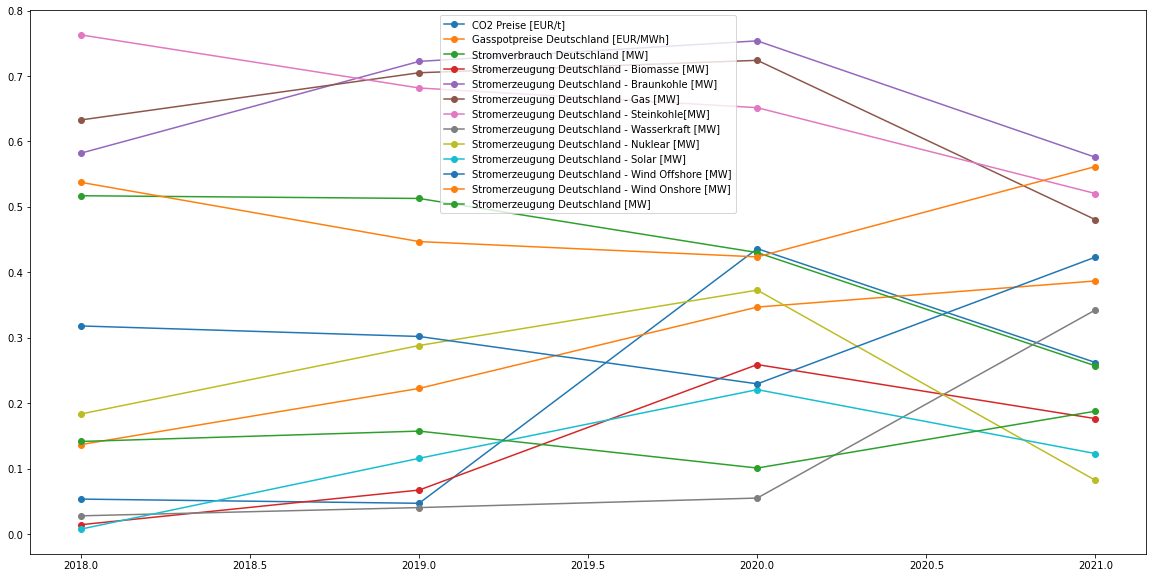

In [25]:
#drop first column
correlations_with_column_years = correlations_with_column.iloc[:,1:]

#only use absolute values
absolute_correlations_with_column_years =  correlations_with_column_years.abs()

#plot the indiviual rows
fig = absolute_correlations_with_column_years.T.plot(figsize=(20,10), marker="o", linestyle="-")

fig
    
    

One can notice a few things:
- Stromverbrauch lost 0.2 points in correlations in the last 2 years
- Gasspotpreise correlation has increased by 0.2 points
- Stromerzeugung Gas & Kohle has gone down by 0.15 points
- Wasserkraft and CO2 Preise impact has significatnly gone up

# Foreshadowing and Moving Averages

We implement an ARIMA and SARIMA Model and compare it to the prize.

In [26]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

#train on all but the last 8 weeks
train_data = df["Stromspotpreise Deutschland [EUR/MWh]"][-24*7*8:]

# Fit SARIMA model using manual parameter specification
sarima_model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,24))
sarima_result = sarima_model.fit()

c:\Users\Visual\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)
c:\Users\Visual\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  % freq, ValueWarning)


In [27]:
#forecast last 8 weeks
forecast = sarima_result.predict(end="2021-06-30")

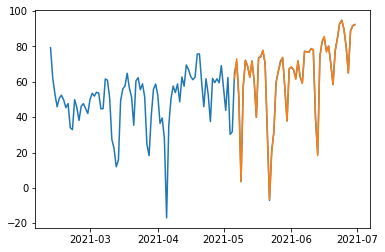

In [28]:
forecast_daily = forecast.resample("D").mean()
plt.plot(df_daily["Stromspotpreise Deutschland [EUR/MWh]"][-7*20:], label="original")
plt.plot(forecast_daily, label="forecast_daily")


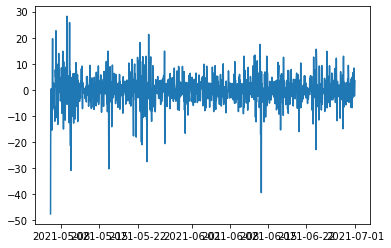

In [29]:
plt.plot((forecast - df["Stromspotpreise Deutschland [EUR/MWh]"])[-7*24*8:])

In [30]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

observed = df["Stromspotpreise Deutschland [EUR/MWh]"][-7*8*24:]
predicted = forecast

mae = mean_absolute_error(observed, predicted)
mse = mean_squared_error(observed, predicted)
print(f'MAE: {mae}')
print(f'MSE: {mse}')

MAE: 3.7094338496809702
MSE: 30.493706698124594


# Further Ideas

Demand & Production
- aggregate those values and compare it with the price
- do a time series analysis on those values
- in particular compare their difference

Clustering
- look at the correlation coefficients for different hours of the day over all time and see if different values impact the price during different times of the day
- correlate the hourly difference of demand and production to the price or even its increase/decrease

Bonus Data
- get data of the temperature in germany and compare the correlation to price

# Demand and Production

We try a time series analysis on the demand and production

In [31]:
#define a plotting function
def plot_3(
    prices: pd.Series,
    demand: pd.Series,
    production: pd.Series,
    start_date: str or None = None,
    end_date: str or None = None,
    title: str = "",
):
    if start_date is None:
        start_date = prices.index[0]
    start_date = pd.to_datetime(start_date)

    if end_date is None:
        end_date = prices.index[-1]
    end_date = pd.to_datetime(end_date)

    fig, ax1 = plt.subplots(figsize=(10, 2))
    ax1.set_title(title)

    ax1.set_ylabel("EUR/MWh")
    prices[start_date:end_date].plot(ax=ax1, color="C0")

    ax2 = ax1.twinx()
    ax2.set_ylabel("MW")
    demand[start_date:end_date].plot(ax=ax2, color="C1")
    production[start_date:end_date].plot(ax=ax2, color="C2")
    # fig.tight_layout()
    plt.show()

#define a plotting function handling the decompositions
def plot_3_decomps(
    df: pd.DataFrame,
    price_decomp,
    demand_decomp,
    production_decomp,
    title: str or None = None,
    start_date: str or None = None,
    end_date: str or None = None,
):
    plot_3(
        df["Stromspotpreise Deutschland [EUR/MWh]"],
        df["Stromverbrauch Deutschland [MW]"],
        df["Stromerzeugung Deutschland [MW]"],
        title=f"{title}: Preis [blau] vs Verbrauch [orange] vs Erzeugung [grün]",
        start_date=start_date,
        end_date=end_date,
    )
    plot_3(
        price_decomp.trend + price_decomp.seasonal,
        demand_decomp.trend + demand_decomp.seasonal,
        production_decomp.trend + production_decomp.seasonal,
        start_date=start_date,
        end_date=end_date,
        title="Trend + Saisonal",
    )
    plot_3(
        price_decomp.trend,
        demand_decomp.trend,
        production_decomp.trend,
        start_date=start_date,
        end_date=end_date,
        title="Trend",
    )
    plot_3(
        price_decomp.seasonal,
        demand_decomp.seasonal,
        production_decomp.seasonal,
        start_date=start_date,
        end_date=end_date,
        title="Saisonal",
    )
    plot_3(
        price_decomp.resid,
        demand_decomp.resid,
        production_decomp.resid,
        start_date=start_date,
        end_date=end_date,
        title="Residual",
    )

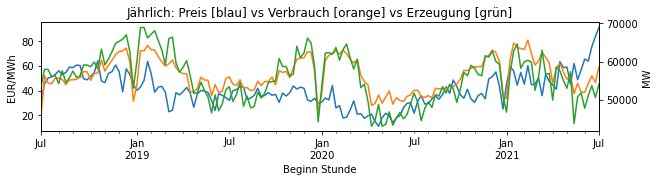

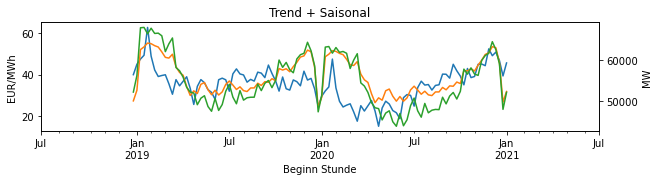

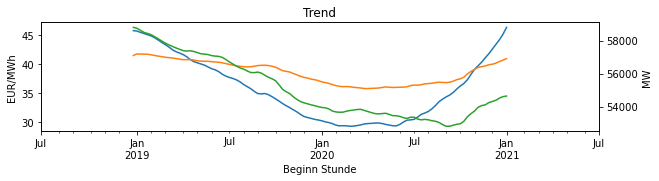

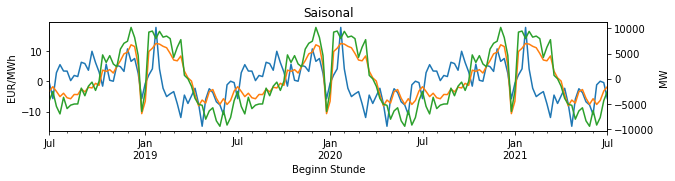

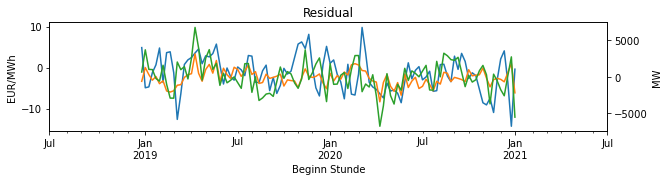

In [32]:
yearly_price = seasonal_decompose(
    df_weekly["Stromspotpreise Deutschland [EUR/MWh]"], model="additive", period=52
)
yearly_demand = seasonal_decompose(
    df_weekly["Stromverbrauch Deutschland [MW]"], model="additive", period=52
)
yearly_production = seasonal_decompose(
    df_weekly["Stromerzeugung Deutschland [MW]"], model="additive", period=52
)

plot_3_decomps(
    df_weekly,
    yearly_price,
    yearly_demand,
    yearly_production,
    title="Jährlich",
)

Very noticeable is a very deep fall of production and deman during the last week of the year.